In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import numpy as np

In [3]:
#data loading into working space
df = pd.read_csv("C:/Users/Admin/Desktop/diabetes_unclean.csv")
df.head()

ID  No_Pation Gender   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M  26.0   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M  33.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

In [4]:
df.head()

ID  No_Pation Gender   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M  26.0   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M  33.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

In [6]:
#showing the columns of the data set
df.columns


Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [9]:
df.rename(columns={'ID':'Patients ID','No_Pation':'Number of Patients','Gender':'Sex','AGE':'Patient Age '},inplace=True)
df.head()

Patients ID  Number of Patients Sex  Patient Age   Urea    Cr  HbA1c  Chol  \
0          502               17975   F          50.0   4.7  46.0    4.9   4.2   
1          735               34221   M          26.0   4.5  62.0    4.9   3.7   
2          420               47975   F          50.0   4.7  46.0    4.9   4.2   
3          680               87656   F          50.0   4.7  46.0    4.9   4.2   
4          504               34223   M          33.0   7.1  46.0    4.9   4.9   

    TG  HDL  LDL  VLDL   BMI CLASS  
0  0.9  2.4  1.4   0.5  24.0     N  
1  1.4  1.1  2.1   0.6  23.0     N  
2  0.9  2.4  1.4   0.5  24.0     N  
3  0.9  2.4  1.4   0.5  24.0     N  
4  1.0  0.8  2.0   0.4  21.0     N

In [10]:
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           1
Urea                  1
Cr                    2
HbA1c                 3
Chol                  2
TG                    2
HDL                   1
LDL                   2
VLDL                  1
BMI                   0
CLASS                 0
dtype: int64

In [11]:
mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           0
Urea                  0
Cr                    0
HbA1c                 0
Chol                  0
TG                    0
HDL                   0
LDL                   0
VLDL                  0
BMI                   0
CLASS                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patients ID         994 non-null    int64  
 1   Number of Patients  994 non-null    int64  
 2   Sex                 994 non-null    object 
 3   Patient Age         994 non-null    float64
 4   Urea                994 non-null    float64
 5   Cr                  994 non-null    float64
 6   HbA1c               994 non-null    float64
 7   Chol                994 non-null    float64
 8   TG                  994 non-null    float64
 9   HDL                 994 non-null    float64
 10  LDL                 994 non-null    float64
 11  VLDL                994 non-null    float64
 12  BMI                 994 non-null    float64
 13  CLASS               994 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.5+ KB


In [14]:
df.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     830
Y       8
Name: CLASS, dtype: int64

In [16]:
duplicates = df[df.duplicated()]

df['CLASS'].unique()



array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [17]:
df['CLASS'] = df['CLASS'].str.replace('N ','N')
df['CLASS'] = df['CLASS'].str.replace('Y ','Y')

In [18]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [19]:
df.groupby('Sex')['Sex'].agg('count')

Sex
F    430
M    562
f      2
Name: Sex, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Patients ID'>

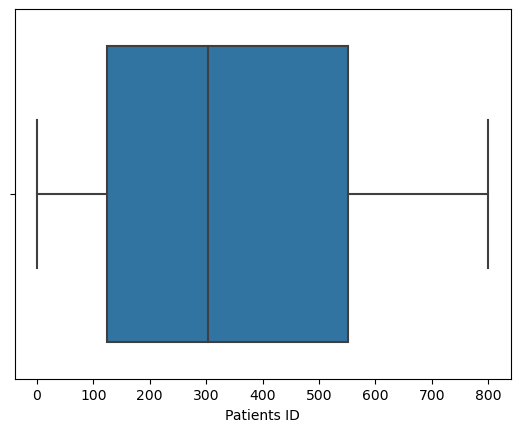

In [20]:
sns.boxplot(df['Patients ID'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HbA1c'>

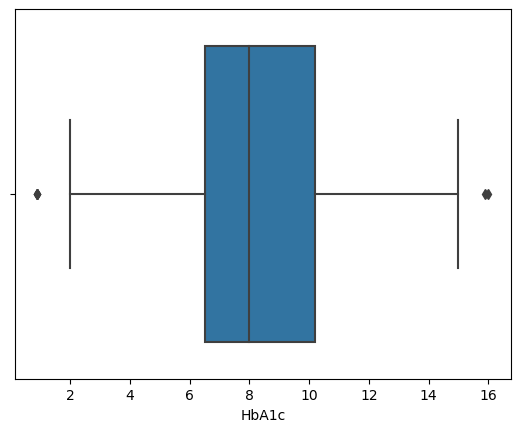

In [21]:
sns.boxplot(df['HbA1c'])

In [22]:
max_HbA1c = df['HbA1c'].quantile(0.995)
max_HbA1c

14.703499999999996

In [23]:
df[df['HbA1c']<max_HbA1c]

Patients ID  Number of Patients Sex  Patient Age   Urea     Cr  HbA1c  \
0             502               17975   F          50.0   4.7   46.0    4.9   
1             735               34221   M          26.0   4.5   62.0    4.9   
2             420               47975   F          50.0   4.7   46.0    4.9   
3             680               87656   F          50.0   4.7   46.0    4.9   
4             504               34223   M          33.0   7.1   46.0    4.9   
...           ...                 ...  ..           ...   ...    ...    ...   
1000          185              454316   M          64.0   8.8  106.0    8.5   
1002          188              454316   F          75.0  10.3  113.0    8.6   
1003          189              454316   M          58.0   4.0   55.0    7.9   
1007          194              454316   F          57.0   4.1   70.0    9.3   
1008          195                4543   f          55.0   4.1   34.0   13.9   

      Chol   TG  HDL  LDL  VLDL   BMI CLASS  
0      4.2  0.9  2.4  1.4   0.5  24.0     N  
1      3.7  1.4  1.1  2.1   0.6  23.0     N  
2      4.2  0.9  2.4  1.4   0.5  24.0     N  
3      4.2  0.9  2.4  1.4   0.5  24.0     N  
4      4.9  1.0  0.8  2.0   0.4  21.0     N  
...    ...  ...  ...  ...   ...   ...   ...  
1000   5.9  2.1  1.2  4.0   1.2  32.0     Y  
1002   4.2  1.6  0.9  2.6   0.7  32.0     Y  
1003   4.9  2.0  1.2  1.4   1.1  35.0     Y  
1007   5.3  3.3  1.0  1.4   1.3  29.0     Y  
1008   5.4  1.6  1.6  3.1   0.7  33.0     Y  

[989 rows x 14 columns]

In [26]:
df.to_csv('Alphine_medical_center_clean_dataset.csv')

In [27]:
#loading the clean data set into the system
df1 = pd.read_csv("C:/Users/Admin/Desktop/muhumuza abbibu 2019.u.mmu.bit.007/Alphine_medical_center_clean_dataset.csv")
df1.head()

Unnamed: 0  Patients ID  Number of Patients Sex  Patient Age   Urea    Cr  \
0           0          502               17975   F          50.0   4.7  46.0   
1           1          735               34221   M          26.0   4.5  62.0   
2           2          420               47975   F          50.0   4.7  46.0   
3           3          680               87656   F          50.0   4.7  46.0   
4           4          504               34223   M          33.0   7.1  46.0   

   HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS  
0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N  
1    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N  
2    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N  
3    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N  
4    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N

In [28]:
import matplotlib.pyplot as plt
cor=df1.corr()
cor

Unnamed: 0  Patients ID  Number of Patients  Patient Age   \
Unnamed: 0            1.000000    -0.177909           -0.055277      0.393336   
Patients ID          -0.177909     1.000000            0.064657     -0.072782   
Number of Patients   -0.055277     0.064657            1.000000     -0.088943   
Patient Age           0.393336    -0.072782           -0.088943      1.000000   
Urea                  0.105214    -0.095508           -0.019057      0.108681   
Cr                    0.013894    -0.100030            0.000946      0.056840   
HbA1c                 0.586014    -0.009046           -0.032351      0.384742   
Chol                  0.184902     0.047009           -0.030296      0.039196   
TG                    0.223262    -0.053071           -0.039999      0.148971   
HDL                   0.029222     0.024761           -0.013515     -0.020844   
LDL                  -0.018719    -0.064982           -0.003410      0.012395   
VLDL                 -0.025592     0.145508            0.113634     -0.090851   
BMI                   0.364787     0.046151            0.017667      0.381068   

                        Urea        Cr     HbA1c      Chol        TG  \
Unnamed: 0          0.105214  0.013894  0.586014  0.184902  0.223262   
Patients ID        -0.095508 -0.100030 -0.009046  0.047009 -0.053071   
Number of Patients -0.019057  0.000946 -0.032351 -0.030296 -0.039999   
Patient Age         0.108681  0.056840  0.384742  0.039196  0.148971   
Urea                1.000000  0.624921 -0.023310  0.001770  0.041345   
Cr                  0.624921  1.000000 -0.037737 -0.007725  0.055687   
HbA1c              -0.023310 -0.037737  1.000000  0.177820  0.214232   
Chol                0.001770 -0.007725  0.177820  1.000000  0.318481   
TG                  0.041345  0.055687  0.214232  0.318481  1.000000   
HDL                -0.038016 -0.023429  0.030459  0.103884 -0.082876   
LDL                -0.006619  0.041049  0.011557  0.418861  0.015191   
VLDL               -0.011696  0.010307  0.072643  0.076741  0.146084   
BMI                 0.045390  0.054703  0.413500  0.018384  0.110265   

                         HDL       LDL      VLDL       BMI  
Unnamed: 0          0.029222 -0.018719 -0.025592  0.364787  
Patients ID         0.024761 -0.064982  0.145508  0.046151  
Number of Patients -0.013515 -0.003410  0.113634  0.017667  
Patient Age        -0.020844  0.012395 -0.090851  0.381068  
Urea               -0.038016 -0.006619 -0.011696  0.045390  
Cr                 -0.023429  0.041049  0.010307  0.054703  
HbA1c               0.030459  0.011557  0.072643  0.413500  
Chol                0.103884  0.418861  0.076741  0.018384  
TG                 -0.082876  0.015191  0.146084  0.110265  
HDL                 1.000000 -0.142071 -0.059836  0.072646  
LDL                -0.142071  1.000000  0.062710 -0.067297  
VLDL               -0.059836  0.062710  1.000000  0.197905  
BMI                 0.072646 -0.067297  0.197905  1.000000

<AxesSubplot:>

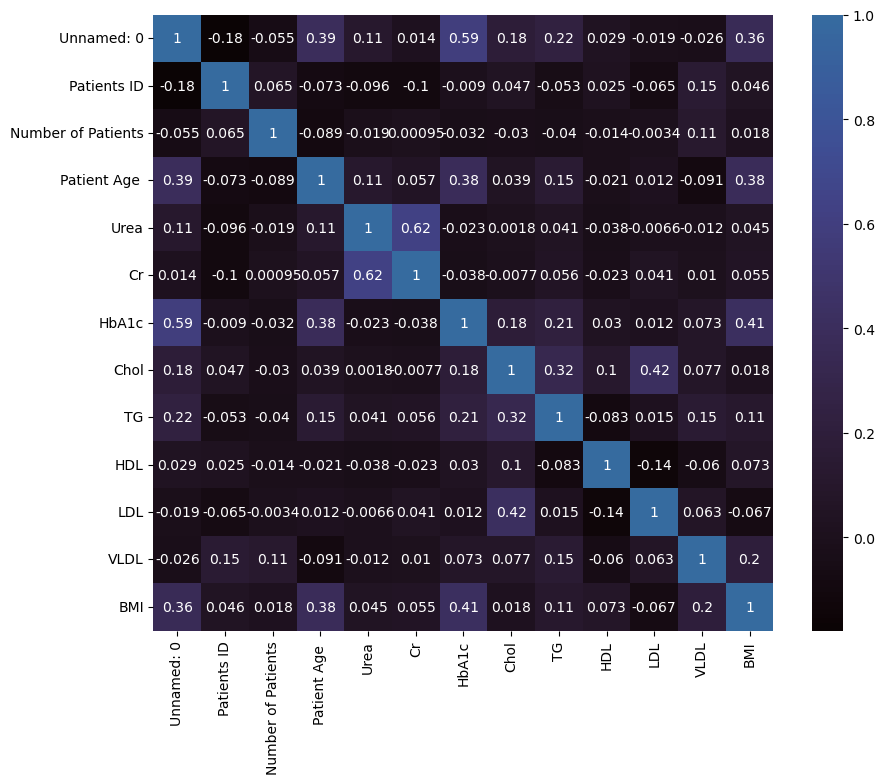

In [34]:
import matplotlib.pyplot as plt

#increasing the corrolation size
plt.figure(figsize=(10,8))
sns.heatmap(data=cor, annot=True, cmap='mako', center=1.14)